<a href="https://colab.research.google.com/github/woraphonp-038-5/Project-Big-Data/blob/main/ThaiBaan_Data_Analytics_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 2: Data Analytics and Modeling

<img src="https://datarundown.com/wp-content/uploads/2023/05/Model-Data-Analytics.jpg" width="400px">

ชื่อกลุ่ม: ...

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. ...
2. ...
3. ...
4. ...

กำหนดส่ง: ศุกร์ 24 ตุลาคม 2568  

รายงานในชั้นเรียน: เสาร์ 25 ตุลาคม 2568

** NOTE **
* อย่าลืมบันทึกงานที่ทำในโน้ตบุ๊คนี้เป็นประจำขณะทำงาน มิเช่นนั้นงานที่ทำอยู่อาจสูญหายได้
* **เริ่มทำแต่เนิ่น ๆ อย่ารอที่จะทำก่อนส่ง เพราะจะทำไม่เสร็จ เนื่องจากปัญหามากมายที่จะเกิดขึ้นระหว่างการทำงาน และอาจารย์ไม่รับปรึกษาในคืนก่อนส่ง**
----------------------

### เลือกชุดข้อมูล 1 ชุดจากข้อมูลที่กำหนดให้ต่อไปนี้
* <b>MovieLens 1M Data Set<b>
    * ข้อมูลชุดนี้มีข้อมูลเกี่ยวกับ movies, users, และ how they rate the movies
    * สามารถดูรายละเอียดได้ที่ http://grouplens.org/datasets/movielens/
    * Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/
    * Merge all of the data into a single Pandas DataFrame. See
        * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
    
* <b>Walmart_Sales_Forecast<b>
    * สามารถดูรายละเอียดได้ที่ https://github.com/Asikpalysik/Walmart_Sales_Forecast/tree/main
    * ข้อมูลประกอบด้วยไฟล์ features.csv, stores.csv และ ข้อมูลยอดขาย (train.csv และ test.csv)
    * ให้ใช้ข้อมูลจากทุกไฟล์ทุกอย่างประกอบกันในการวิเคราะห์
    
* <b>NYC Taxi Trips<b>
    * ข้อมูลทริปของแท็กซี่ในเมืองนิวยอร์กจาก https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
    * ข้อมูลเก็บโดย The NYC Taxi and Limousine Commission (TLC) ประกอบด้วย pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts
    * นอกจากไฟล์ข้อมูลทริปของแท็กซี่แล้ว ยังมีข้อมูลเกี่ยวกับ zone ของพื้นที่ที่ให้บริการ และคำอธิบายข้อมูลในส่วนล่างสุดของหน้าเดียวกัน
    * ให้ศึกษาข้อมูลการเดินทางของแท็กซี่เหลืองหรือแท็กซี่เขียวในช่วงหนึ่ง (เช่น 1 เดือน หรือ 1 ปีที่ผ่านมา เป็นต้น)
    * ตัวอย่างการอ่านไฟล์ parquet
    ```python
    # install this module to read .parquet files
    !pip install pyarrow
    import pyarrow.parquet as pq
    trips = pq.read_table('yellow_tripdata_2023-09.parquet')
    trips = trips.to_pandas()
    trips
    ```
    
----------------------------------

### ศึกษาข้อมูลที่เลือกใช้ แล้วทำการ
* Tell story about data อธิบายลักษณะของข้อมูล ทำความเข้าใจเกี่ยวกับข้อมูลชุดนี้ ด้วยสถิติ และนำเสนอด้วยแผนภาพ แผนภูมิ หรือกราฟต่าง ๆ
* ตั้ง<span style="color:red">*ปัญหาหรือคำถามเชิงองค์กรหรือธุรกิจ*</span>ที่กลุ่มท่านสนใจเกี่ยวกับข้อมูลนี้ แล้วทำการคาดการณ์ (conjectures) เกี่ยวกับ<span style="color:red">*ปัญหาหรือคำถาม*</span>ที่ได้ตั้งไว้อย่างน้อย 3 ข้อ แล้วสนับสนุนหรือปฏิเสธข้อคาดการณ์ด้วยการวิเคราะห์ข้อมูลหรือด้วย data visualization
    * ปัญหาที่สนใจมีความสำคัญอย่างไร?
    * ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถามอย่างไร?
* สร้างตัวแบบทำนายโดยใช้ข้อมูลที่เลือกในการตอบปัญหาหรือคำถาม
    * prepare data
    * feature engineering
    * partition data (consider class if any)
    * handle imbalance data
    * build model
      * hyperparameter tuning
    * test model

## Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

# Load data
movies = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
ratings = '/content/drive/My Drive/ProjectBigData/ml-1m/ratings.dat'
users = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'

# Load data into pandas DataFrames
movies_df = pd.read_csv(movies, sep='::', engine='python', encoding='latin-1', names=['MovieID', 'Title', 'Genres'])
ratings_df = pd.read_csv(ratings, sep='::', engine='python' , encoding='latin-1', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users_df = pd.read_csv(users, sep='::', engine='python', encoding='latin-1', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

In [7]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


## Data Preparation

In [54]:
# Explore variables and check data quality

# Handle missing values, outliers, and noises

# Perform feature engineering (optional)

In [93]:
# Merge data
# Merge ratings and users DataFrames
merged_df = pd.merge(ratings_df, users_df, on='UserID')

# Merge the result with the movies DataFrame
merged_df = pd.merge(merged_df, movies_df, on='MovieID')

In [94]:
# Date Time
merged_df['Datetime'] = pd.to_datetime(merged_df['Timestamp'], unit='s')

In [95]:
# แยกคอลัมน์ Genres ด้วยตัวคั่น '|'
# โดยจำกัดจำนวนคอลัมน์สูงสุดเป็น 3 (สามารถเพิ่มหรือลดตามความเหมาะสม)
split_genres = merged_df['Genres'].str.split('|', expand=True)

# ตั้งชื่อคอลัมน์ใหม่ Genre1, Genre2, Genre3 โดยใช้ iloc เพื่อเลือกคอลัมน์ที่ต้องการ
merged_df['Genre1'] = split_genres.iloc[:, 0]
merged_df['Genre2'] = split_genres.iloc[:, 1]
merged_df['Genre3'] = split_genres.iloc[:, 2]

# ลบคอลัมน์ Genres ออก
merged_df = merged_df.drop(columns=['Genres'])

In [96]:
merged_df['DayOfWeek'] = merged_df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
merged_df['Month'] = merged_df['Datetime'].dt.month
merged_df['Year'] = merged_df['Datetime'].dt.year
merged_df['Hour'] = merged_df['Datetime'].dt.time

In [97]:
# ฟังก์ชันเพื่อแปลง Genre เป็นตัวเลข
def genre_to_number(genre):
    # ถ้า genre เป็น None หรือค่าว่าง ให้คืนค่า 0
    if genre is None or genre == '':
        return 0

    # Check if genre is of type int or float before proceeding
    if isinstance(genre, (int, float)):
        return genre  # Return the value as is if it's already numeric

    genre_dict = {
        "Action": 1,
        "Adventure": 2,
        "Animation": 3,
        "Children's": 4,
        "Comedy": 5,
        "Crime": 6,
        "Documentary": 7,
        "Drama": 8,
        "Fantasy": 9,
        "Film-Noir": 10,
        "Horror": 11,
        "Musical": 12,
        "Mystery": 13,
        "Romance": 14,
        "Sci-Fi": 15,
        "Thriller": 16,
        "War": 17,
        "Western": 18,
    }

    # Strip any leading/trailing whitespace and return corresponding value or 0 if not found
    return genre_dict.get(genre.strip(), 0)  # Return 0 for unknown genres

# ใช้ apply เพื่อแปลง Genre1, Genre2, Genre3
merged_df['Genre1'] = merged_df['Genre1'].apply(genre_to_number)
merged_df['Genre2'] = merged_df['Genre2'].apply(genre_to_number)
merged_df['Genre3'] = merged_df['Genre3'].apply(genre_to_number)

In [98]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Datetime,Genre1,Genre2,Genre3,DayOfWeek,Month,Year,Hour
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),2000-12-31 22:12:40,8,0,0,6,12,2000,22:12:40
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),2000-12-31 22:35:09,3,4,12,6,12,2000,22:35:09
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),2000-12-31 22:32:48,12,14,0,6,12,2000,22:32:48
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),2000-12-31 22:04:35,8,0,0,6,12,2000,22:04:35
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",2001-01-06 23:38:11,3,4,5,5,1,2001,23:38:11


In [99]:
# คำนวณค่าเฉลี่ยการให้คะแนน (avg_rating) และจำนวนผู้ใช้ที่ให้คะแนน (votes) ต่อเรื่อง
movie_stats = (
    merged_df.groupby(['Title', 'Year', 'Genre1', 'Genre2', 'Genre3'])
    .agg(avg_rating=('Rating', 'mean'), votes=('UserID', 'nunique'))
    .reset_index()
)

# แสดงผลลัพธ์
movie_stats

,Title,Year,Genre1,Genre2,Genre3,avg_rating,votes
0,"$1,000,000 Duck (1971)",2000,4,5,0,3.172414,29
1,"$1,000,000 Duck (1971)",2001,4,5,0,2.750000,4
2,"$1,000,000 Duck (1971)",2002,4,5,0,2.250000,4
3,'Night Mother (1986),2000,8,0,0,3.428571,63
4,'Night Mother (1986),2001,8,0,0,2.800000,5
...,...,...,...,...,...,...,...
11534,Zeus and Roxanne (1997),2002,4,0,0,3.000000,1
11535,eXistenZ (1999),2000,1,15,16,3.265537,354
11536,eXistenZ (1999),2001,1,15,16,3.232558,43
11537,eXistenZ (1999),2002,1,15,16,2.916667,12


In [100]:
merged_df = pd.merge(merged_df, movie_stats[['Title', 'Year', 'avg_rating', 'votes']],
                      on=['Title', 'Year'],
                      how='left')

In [101]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Datetime,Genre1,Genre2,Genre3,DayOfWeek,Month,Year,Hour,avg_rating,votes
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),2000-12-31 22:12:40,8,0,0,6,12,2000,22:12:40,4.398274,1622
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),2000-12-31 22:35:09,3,4,12,6,12,2000,22:35:09,3.464583,480
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),2000-12-31 22:32:48,12,14,0,6,12,2000,22:32:48,4.155477,566
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),2000-12-31 22:04:35,8,0,0,6,12,2000,22:04:35,3.884085,1087
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",2001-01-06 23:38:11,3,4,5,5,1,2001,23:38:11,3.841463,82


In [102]:
merged_df['Gender'] = merged_df['Gender'].map({'M': 0, 'F': 1})
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Datetime,Genre1,Genre2,Genre3,DayOfWeek,Month,Year,Hour,avg_rating,votes
0,1,1193,5,978300760,1,1,10,48067,One Flew Over the Cuckoo's Nest (1975),2000-12-31 22:12:40,8,0,0,6,12,2000,22:12:40,4.398274,1622
1,1,661,3,978302109,1,1,10,48067,James and the Giant Peach (1996),2000-12-31 22:35:09,3,4,12,6,12,2000,22:35:09,3.464583,480
2,1,914,3,978301968,1,1,10,48067,My Fair Lady (1964),2000-12-31 22:32:48,12,14,0,6,12,2000,22:32:48,4.155477,566
3,1,3408,4,978300275,1,1,10,48067,Erin Brockovich (2000),2000-12-31 22:04:35,8,0,0,6,12,2000,22:04:35,3.884085,1087
4,1,2355,5,978824291,1,1,10,48067,"Bug's Life, A (1998)",2001-01-06 23:38:11,3,4,5,5,1,2001,23:38:11,3.841463,82


In [103]:
df_zip = pd.read_csv('/content/georef-united-states-of-america-zc-point.csv', sep=';')
df_zip.head()

,Zip Code,Official USPS city name,Official USPS State Code,Official State Name,ZCTA,ZCTA parent,Population,Density,Primary Official County Code,Primary Official County Name,County Weights,Official County Name,Official County Code,Imprecise,Military,Timezone,Geo Point
0,75010,Carrollton,TX,Texas,True,NaN,30406.0,1452.9,48121,Denton,"{""48121"": ""100""}",Denton,48121,False,False,America/Chicago,"33.03425, -96.89673"
1,14783,Steamburg,NY,New York,True,NaN,305.0,4.7,36009,Cattaraugus,"{""36009"": ""100""}",Cattaraugus,36009,False,False,America/New_York,"42.07798, -78.88412"
2,15675,Penn,PA,Pennsylvania,True,NaN,895.0,373.3,42129,Westmoreland,"{""42129"": ""100""}",Westmoreland,42129,False,False,America/New_York,"40.33531, -79.63708"
3,31057,Marshallville,GA,Georgia,True,NaN,2006.0,8.9,13193,Macon,"{""13193"": ""100""}",Macon,13193,False,False,America/New_York,"32.43286, -83.93537"
4,32202,Jacksonville,FL,Florida,True,NaN,6523.0,1268.6,12031,Duval,"{""12031"": ""100""}",Duval,12031,False,False,America/New_York,"30.32503, -81.64802"


In [104]:
# Rename columns in df_zip
df_zip.rename(columns={'Zip Code': 'Zip-code', 'Official USPS city name': 'city','Official State Name': 'state','Primary Official County Name' :'country'} ,inplace=True)

# Display the updated DataFrame to verify the changes
df_zip.head()

,Zip-code,city,Official USPS State Code,state,ZCTA,ZCTA parent,Population,Density,Primary Official County Code,country,County Weights,Official County Name,Official County Code,Imprecise,Military,Timezone,Geo Point
0,75010,Carrollton,TX,Texas,True,NaN,30406.0,1452.9,48121,Denton,"{""48121"": ""100""}",Denton,48121,False,False,America/Chicago,"33.03425, -96.89673"
1,14783,Steamburg,NY,New York,True,NaN,305.0,4.7,36009,Cattaraugus,"{""36009"": ""100""}",Cattaraugus,36009,False,False,America/New_York,"42.07798, -78.88412"
2,15675,Penn,PA,Pennsylvania,True,NaN,895.0,373.3,42129,Westmoreland,"{""42129"": ""100""}",Westmoreland,42129,False,False,America/New_York,"40.33531, -79.63708"
3,31057,Marshallville,GA,Georgia,True,NaN,2006.0,8.9,13193,Macon,"{""13193"": ""100""}",Macon,13193,False,False,America/New_York,"32.43286, -83.93537"
4,32202,Jacksonville,FL,Florida,True,NaN,6523.0,1268.6,12031,Duval,"{""12031"": ""100""}",Duval,12031,False,False,America/New_York,"30.32503, -81.64802"


In [105]:
# แปลง Zip-code และ Zip Code ให้เป็นชนิดข้อมูล string
# แก้ไข: ใช้ df_zip.columns[0] เพื่ออ้างอิงคอลัมน์แรกแทนชื่อคอลัมน์โดยตรง
df_zip['Zip-code'] = df_zip['Zip-code'].astype(str)
merged_df['Zip-code'] = merged_df['Zip-code'].astype(str)

# Merge DataFrames โดยใช้ Zip-code และ Zip Code
# แก้ไข: ใช้ df_zip.columns[0] เพื่ออ้างอิงคอลัมน์แรกแทนชื่อคอลัมน์โดยตรง
merged_df = pd.merge(merged_df, df_zip[['Zip-code','state']],
                      left_on='Zip-code', right_on='Zip-code', how='left')

In [106]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Datetime,Genre1,Genre2,Genre3,DayOfWeek,Month,Year,Hour,avg_rating,votes,state
0,1,1193,5,978300760,1,1,10,48067,One Flew Over the Cuckoo's Nest (1975),2000-12-31 22:12:40,8,0,0,6,12,2000,22:12:40,4.398274,1622,Michigan
1,1,661,3,978302109,1,1,10,48067,James and the Giant Peach (1996),2000-12-31 22:35:09,3,4,12,6,12,2000,22:35:09,3.464583,480,Michigan
2,1,914,3,978301968,1,1,10,48067,My Fair Lady (1964),2000-12-31 22:32:48,12,14,0,6,12,2000,22:32:48,4.155477,566,Michigan
3,1,3408,4,978300275,1,1,10,48067,Erin Brockovich (2000),2000-12-31 22:04:35,8,0,0,6,12,2000,22:04:35,3.884085,1087,Michigan
4,1,2355,5,978824291,1,1,10,48067,"Bug's Life, A (1998)",2001-01-06 23:38:11,3,4,5,5,1,2001,23:38:11,3.841463,82,Michigan


In [113]:
counts = merged_df.groupby('state').size().reset_index(name='Count')
display(counts.head())

,state,Count
0,Alabama,3480
1,Alaska,911
2,Arizona,14743
3,Arkansas,4347
4,California,176667


In [83]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 19 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   UserID      1000209 non-null  int64         
 1   MovieID     1000209 non-null  int64         
 2   Rating      1000209 non-null  int64         
 3   Timestamp   1000209 non-null  int64         
 4   Gender      1000209 non-null  int64         
 5   Age         1000209 non-null  int64         
 6   Occupation  1000209 non-null  int64         
 7   Zip-code    1000209 non-null  object        
 8   Title       1000209 non-null  object        
 9   Datetime    1000209 non-null  datetime64[ns]
 10  Genre1      1000209 non-null  int64         
 11  Genre2      1000209 non-null  int64         
 12  Genre3      1000209 non-null  int64         
 13  DayOfWeek   1000209 non-null  int32         
 14  Month       1000209 non-null  int32         
 15  Year        1000209 non-null  in

In [69]:
counts = merged_df.groupby('Title').size().reset_index(name='Count')
display(counts)

,Title,Count
0,"$1,000,000 Duck (1971)",37
1,'Night Mother (1986),70
2,'Til There Was You (1997),52
3,"'burbs, The (1989)",303
4,...And Justice for All (1979),199
...,...,...
3701,"Zed & Two Noughts, A (1985)",29
3702,Zero Effect (1998),301
3703,Zero Kelvin (Kjærlighetens kjøtere) (1995),2
3704,Zeus and Roxanne (1997),23


## Explore Data

#### Descriptive statistics

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2101815 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column               Dtype         
---  ------               -----         
 0   UserID               int64         
 1   MovieID              int64         
 2   Rating               int64         
 3   Timestamp            int64         
 4   Gender               object        
 5   Age                  object        
 6   Occupation           object        
 7   Zip-code             object        
 8   Title                object        
 9   Genres               object        
 10  Datetime             datetime64[ns]
 11  Age_Group_Numerical  object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 208.5+ MB


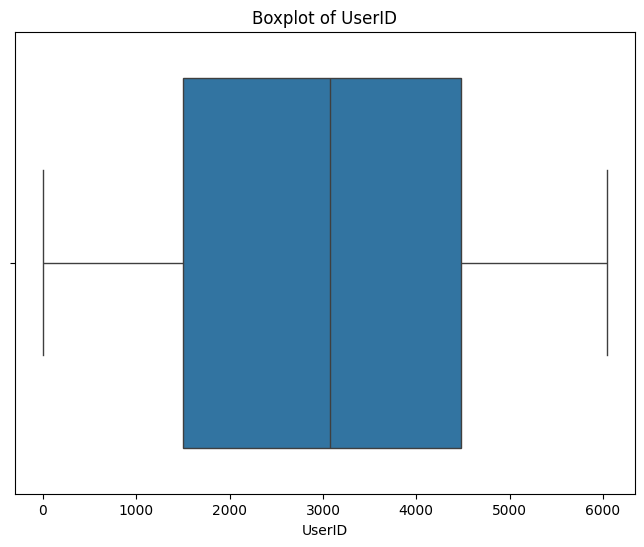

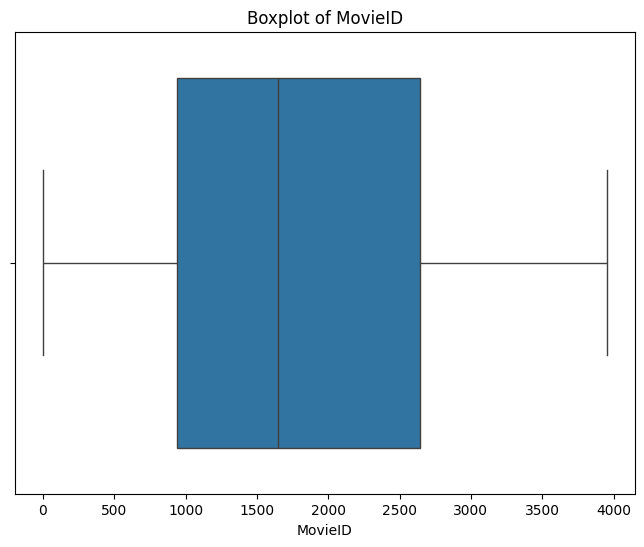

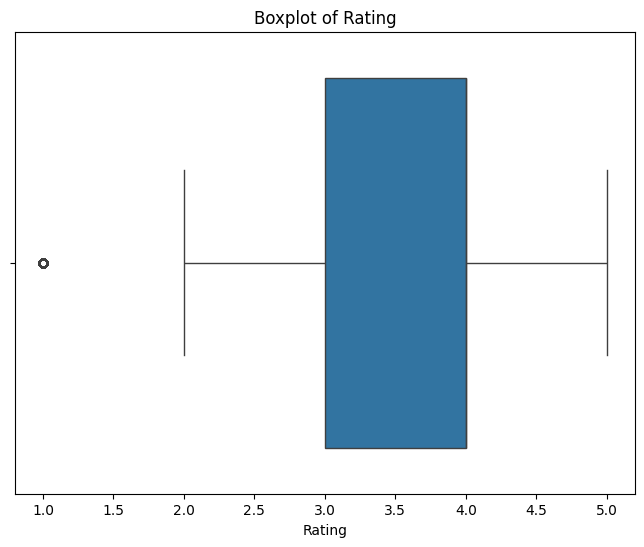

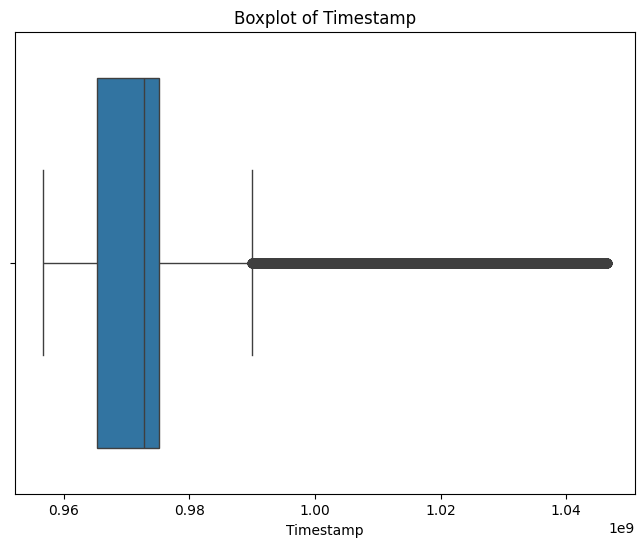

In [ ]:
# prompt: boxplot ตัวแปรแต่ละตัว

import matplotlib.pyplot as plt
import seaborn as sns

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numerical_cols = merged_df.select_dtypes(include=['number']).columns

# สร้าง boxplot สำหรับแต่ละคอลัมน์
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # ปรับขนาดกราฟตามต้องการ
    sns.boxplot(x=merged_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


เพศ

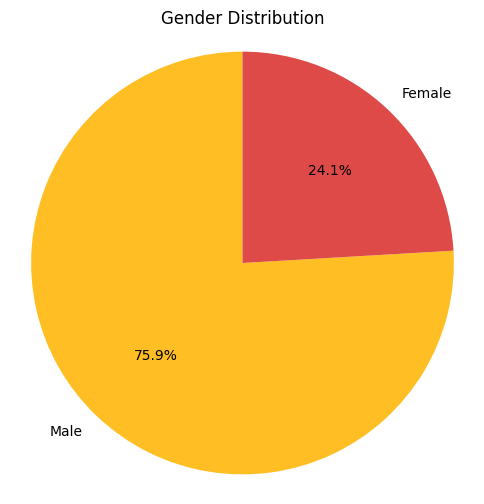

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
mycolors = {'#ffbe24','#466288','#de4a48'}
# Assuming 'Gender' column has values 0 and 1 (or 'M' and 'F')
gender_counts = merged_df['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette(mycolors))
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Age

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# กำหนดกลุ่มอาชีพ
occupation_labels = [
    "other or not specified", "academic/educator", "artist", "clerical/admin",
    "college/grad student", "customer service", "doctor/health care",
    "executive/managerial", "farmer", "homemaker", "K-12 student",
    "lawyer", "programmer", "retired", "sales/marketing", "scientist",
    "self-employed", "technician/engineer", "tradesman/craftsman",
    "unemployed", "writer"
]

# นับจำนวน UserID ที่ไม่ซ้ำในแต่ละกลุ่มอาชีพและเรียงลำดับจากมากไปน้อย
occupation_counts_unique = merged_df.groupby('Occupation')['UserID'].nunique().sort_values(ascending=False)

# สร้าง Bar Chart โดยเรียงลำดับจากมากไปน้อยด้วยการใช้ 'order'
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='UserID', data=merged_df,
            estimator=lambda x: len(set(x)),
            order=occupation_counts_unique.index,
            palette='crest')

# ตั้งชื่อกราฟและแกน
plt.title('UserID Count by Occupation')
plt.xlabel('Occupation')
plt.ylabel('UserID Count')

# ปรับตำแหน่งชื่ออาชีพให้สวยงาม
plt.xticks(ticks=range(len(occupation_counts_unique)), labels=[occupation_labels[i] for i in occupation_counts_unique.index], rotation=45, ha='right')

# ตั้งขอบเขตของแกน y เพื่อป้องกันค่าที่เลยไป
plt.ylim(0, occupation_counts_unique.max() * 1.1)

# แสดงกราฟ
plt.show()


#### Data visualization

#### Target variable analysis

- Target variable analysis: examine how each feature correlates with or impacts the target/interested variable


## Data Modeling

In [ ]:
# Partition data

# Handle imbalance data (optional)

# Model selection and tuning

# Evaluate models


#### สรุปผลที่ได้
...

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab / GitHub ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * Data Description: อธิบายข้อมูลที่ใช้
    * Data Preparation: การเตรียมข้อมูลก่อนวิเคราะห์
    * Motivation: ปัญหาหรือคำถามที่ตั้ง ทำไมถึงสนใจที่จะทำงานในเรื่องนี้
    * Communicating Results (with figure, table, etc.): ผลที่ได้จากการศึกษา โดยระบุแนวทางที่ใช้ที่ทำให้เกิดผลลัพธ์ดังกล่าวด้วย
        โดยไม่ต้องนำเสนอ source code ผลประกอบด้วย 2 ส่วนสำคัญ จาก
        * Conjectures >= 3 ข้อ
        * Machine learning models
    * Conclusion: สรุปผลที่ได้จากการวิเคราะห์ข้อมูล
** Note: แต่ละกลุ่มส่งแต่ละไฟล์ครั้งเดียว **
---------------------

---

## **Data**

---

### **รายละเอียดข้อมูล MovieLens 1M**

### 1️⃣ **ไฟล์ ratings.dat**

**โครงสร้างข้อมูล:**

```
UserID::MovieID::Rating::Timestamp
```

**รายละเอียด:**

* UserID: หมายเลขผู้ใช้ (1 ถึง 6040)
* MovieID: หมายเลขภาพยนตร์ (1 ถึง 3952)
* Rating: คะแนนจาก 1 ถึง 5 ดาว (เต็มดาวเท่านั้น)
* Timestamp: เวลาการให้คะแนน (หน่วยเป็นวินาที ตั้งแต่ epoch time)
* ผู้ใช้ทุกคนให้คะแนนอย่างน้อย **20 เรื่อง**

---

### 2️⃣ **ไฟล์ users.dat**

**โครงสร้างข้อมูล:**

```
UserID::Gender::Age::Occupation::Zip-code
```

**รายละเอียด:**

* Gender:

  * “M” = ผู้ชาย
  * “F” = ผู้หญิง
* Age (ช่วงอายุ):

  ```
  1: ต่ำกว่า 18 ปี
  18: 18–24 ปี
  25: 25–34 ปี
  35: 35–44 ปี
  45: 45–49 ปี
  50: 50–55 ปี
  56: 56 ปีขึ้นไป
  ```
* Occupation (อาชีพ):

  ```
  0: อื่น ๆ / ไม่ระบุ
  1: ครู / นักวิชาการ
  2: ศิลปิน
  3: ธุรการ / งานสำนักงาน
  4: นักศึกษามหาวิทยาลัย / บัณฑิตศึกษา
  5: บริการลูกค้า
  6: แพทย์ / สาธารณสุข
  7: ผู้บริหาร / ผู้จัดการ
  8: เกษตรกร
  9: แม่บ้าน
  10: นักเรียนมัธยม
  11: ทนายความ
  12: โปรแกรมเมอร์
  13: ผู้เกษียณอายุ
  14: ฝ่ายขาย / การตลาด
  15: นักวิทยาศาสตร์
  16: อาชีพอิสระ
  17: ช่างเทคนิค / วิศวกร
  18: ช่างฝีมือ / ช่างไม้
  19: ว่างงาน
  20: นักเขียน
  ```
* ข้อมูลประชากรทั้งหมดมาจากการกรอกโดยสมัครใจของผู้ใช้
  และ **ไม่ได้ตรวจสอบความถูกต้อง**

---

### 3️⃣ **ไฟล์ movies.dat**

**โครงสร้างข้อมูล:**

```
MovieID::Title::Genres
```

**รายละเอียด:**

* Title: ชื่อภาพยนตร์ (รวมปีที่ออกฉายตาม IMDb)
* Genres: ประเภทของภาพยนตร์ (คั่นด้วย “|”)
  เช่น `Action|Comedy|Romance`
* หมวดหมู่ภาพยนตร์ที่ใช้มีดังนี้:

  ```
  Action, Adventure, Animation, Children's, Comedy, Crime,
  Documentary, Drama, Fantasy, Film-Noir, Horror, Musical,
  Mystery, Romance, Sci-Fi, Thriller, War, Western
  ```
* หมายเลขภาพยนตร์บางรายการอาจเป็นข้อมูลซ้ำหรือข้อมูลทดสอบ
* รายการภาพยนตร์ส่วนใหญ่ถูกป้อนด้วยมือ อาจมีข้อผิดพลาดเล็กน้อย

#### ปัญหา/คำถามที่สนใจคืออะไร
...

#### ปัญหา/คำถามที่สนใจมีความสำคัญอย่างไร?
...

#### ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถาม
1. ...
2. ...
3. ...
4. (Optional)
5. (Optional)